# Essential labiraries

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

#Data Preprocessing

## 1. Data Exploration

In [ ]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 64 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   float64
 1   Attrition                          1470 non-null   object 
 2   BusinessTravel                     1470 non-null   object 
 3   DailyRate                          1470 non-null   float64
 4   Department                         1470 non-null   object 
 5   DistanceFromHome                   1470 non-null   float64
 6   Education                          1470 non-null   float64
 7   EducationField                     1470 non-null   object 
 8   EmployeeCount                      1470 non-null   float64
 9   EmployeeNumber                     1470 non-null   float64
 10  EnvironmentSatisfaction            1470 non-null   float64
 11  Gender                             1470 non-null   objec

  As we see in our dataset their is no missing values and we have 26 int type and 9 object type
  our target attribut or classe i the Attrition  so the objective is to predict what are the factor that can influence the secision of each employees

  for now i think the attribut that can determine the employees choice are   Age  ,DistanceFromHome ,EnvironmentSatisfaction ,JobSatisfaction ,MonthlyIncome ,RelationshipSatisfaction  , StandardHours , WorkLifeBalance , YearsWithCurrManager ,YearsSinceLastPromotion , YearsInCurrentRole
  
  but if we want to ensure this we have to calculate the corr betweeb these variables and the target classe

In [72]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000
mean,0.450567,0.501421,0.292590,0.478231,0.0,0.495339,0.573923,0.512731,0.576644,0.265986,...,0.054422,0.198639,0.221769,0.056463,0.222449,0.457823,0.319728,1.0,0.717007,0.282993
std,0.217509,0.288840,0.289531,0.256041,0.0,0.291255,0.364361,0.290420,0.237187,0.276735,...,0.226925,0.399112,0.415578,0.230891,0.416033,0.498387,0.466530,0.0,0.450606,0.450606
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.285714,0.259843,0.035714,0.250000,0.0,0.237179,0.333333,0.257143,0.333333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,0.428571,0.501074,0.214286,0.500000,0.0,0.493227,0.666667,0.514286,0.666667,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000
75%,0.595238,0.755190,0.464286,0.750000,0.0,0.752177,1.000000,0.767857,0.666667,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


## Exploratory Analysis and Visualization

In [73]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Age

In [74]:
df.Age.describe()

count    1470.000000
mean        0.450567
std         0.217509
min         0.000000
25%         0.285714
50%         0.428571
75%         0.595238
max         1.000000
Name: Age, dtype: float64

In [75]:
fig = px.histogram(df,
                   x='Age',
                   marginal='box',
                   color="Attrition",
                  color_discrete_sequence=['green', 'grey'],
                   title='Distribution of Age with Attrition')
fig.update_layout(bargap=0.1)
fig.show()

### DistanceFromHome

In [76]:
fig = px.histogram(df,
                   x='DistanceFromHome',
                   marginal='box',
                   color="Attrition",
                  color_discrete_sequence=['green', 'grey'],
                   title='Distribution of DistanceFromHome with Attrition')
fig.update_layout(bargap=0.1)
fig.show()

### EnvironmentSatisfaction

In [77]:
fig = px.histogram(df,
                   x='EnvironmentSatisfaction',
                   marginal='box',
                   color="Attrition",
                  color_discrete_sequence=['green', 'grey'],
                   title='Distribution of  EnvironmentSatisfaction with Attrition')
fig.update_layout(bargap=0.1)
fig.show()

### JobSatisfaction

In [78]:
fig = px.histogram(df,
                   x='JobSatisfaction',
                   marginal='box',
                   color="Attrition",
                  color_discrete_sequence=['green', 'grey'],
                   title='Distribution of  JobSatisfaction with Attrition')
fig.update_layout(bargap=0.1)
fig.show()

### MonthlyIncome

In [79]:
fig = px.histogram(df,
                   x='MonthlyIncome',
                   marginal='box',
                   color="Attrition",
                  color_discrete_sequence=['green', 'grey'],
                   title='Distribution of  MonthlyIncome with Attrition')
fig.update_layout(bargap=0.1)
fig.show()

###  RelationshipSatisfaction

In [80]:
fig = px.histogram(df,
                   x='RelationshipSatisfaction',
                   marginal='box',
                   color="Attrition",
                  color_discrete_sequence=['green', 'grey'],
                   title='Distribution of  MonthlyIncome with Attrition')
fig.update_layout(bargap=0.1)
fig.show()

### TotalWorkingYears

In [81]:
fig = px.histogram(df,
                   x='TotalWorkingYears',
                   marginal='box',
                   color="Attrition",
                  color_discrete_sequence=['green', 'grey'],
                   title='Distribution of TotalWorkingYears with Attrition')
fig.update_layout(bargap=0.1)
fig.show()

###  MaritalStatus

In [82]:
fig = px.histogram(df,
                   x='MaritalStatus',
                   marginal='box',
                   color="Attrition",
                  color_discrete_sequence=['green', 'grey'],
                   title='Distribution of MaritalStatus with Attrition')
fig.update_layout(bargap=0.1)
fig.show()

### JobInvolvement

In [83]:
fig = px.histogram(df,
                   x='JobInvolvement',
                   marginal='box',
                   color="Attrition",
                  color_discrete_sequence=['green', 'grey'],
                   title='Distribution of JobInvolvement with Attrition')
fig.update_layout(bargap=0.1)
fig.show()

### JobLevel

In [84]:
fig = px.histogram(df,
                   x='JobLevel',
                   marginal='box',
                   color="Attrition",
                  color_discrete_sequence=['green', 'grey'],
                   title='Distribution of JobLevel with Attrition')
fig.update_layout(bargap=0.1)
fig.show()

### NumCompaniesWorked

In [85]:
fig = px.histogram(df,
                   x='NumCompaniesWorked',
                   marginal='box',
                   color="Attrition",
                  color_discrete_sequence=['green', 'grey'],
                   title='Distribution of NumCompaniesWorked with Attrition')
fig.update_layout(bargap=0.1)
fig.show()

### TotalWorkingYears

In [86]:
fig = px.histogram(df,
                   x='TotalWorkingYears',
                   marginal='box',
                   color="Attrition",
                  color_discrete_sequence=['green', 'grey'],
                   title='Distribution of TotalWorkingYears with Attrition')
fig.update_layout(bargap=0.1)
fig.show()

### WorkLifeBalance

In [87]:
fig = px.histogram(df,
                   x='WorkLifeBalance',
                   marginal='box',
                   color="Attrition",
                  color_discrete_sequence=['green', 'grey'],
                   title='Distribution of WorkLifeBalance with Attrition')
fig.update_layout(bargap=0.1)
fig.show()

### YearsSinceLastPromotion

In [88]:
fig = px.histogram(df,
                   x='YearsSinceLastPromotion',
                   marginal='box',
                   color="Attrition",
                  color_discrete_sequence=['green', 'grey'],
                   title='Distribution of YearsSinceLastPromotion with Attrition')
fig.update_layout(bargap=0.1)
fig.show()

### YearsWithCurrManager

In [89]:
fig = px.histogram(df,
                   x='YearsWithCurrManager',
                   marginal='box',
                   color="Attrition",
                  color_discrete_sequence=['green', 'grey'],
                   title='Distribution of YearsWithCurrManager with Attrition')
fig.update_layout(bargap=0.1)
fig.show()

### TotalWorkingYears

In [90]:
fig = px.histogram(df,
                   x='TotalWorkingYears',
                   marginal='box',
                   color="Attrition",
                  color_discrete_sequence=['green', 'grey'],
                   title='Distribution of TotalWorkingYears with Attrition')
fig.update_layout(bargap=0.1)
fig.show()

In [91]:
int64_columns = df.select_dtypes(include=['object']).columns
print(int64_columns)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [92]:
df.Attrition.value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [93]:
df.BusinessTravel.value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [94]:
df.Department.value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [95]:
df.EducationField.value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [96]:
df.Gender.value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [97]:
df.JobRole.value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [98]:
df.MaritalStatus.value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [99]:
df.Over18.value_counts()

Over18
Y    1470
Name: count, dtype: int64

In [100]:
df.OverTime.value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

## Data Cleaning

In [101]:
df.isnull().sum()

Age                      0
Attrition                0
BusinessTravel           0
DailyRate                0
Department               0
                        ..
MaritalStatus_Married    0
MaritalStatus_Single     0
Over18_Y                 0
OverTime_No              0
OverTime_Yes             0
Length: 64, dtype: int64

As we see their is no missing values in our dataset

## 3. Data Encoding.

In [102]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes('object').columns.tolist()
categorical_cols.remove('Attrition')

In [103]:
print(numeric_cols)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Human Resources', 'Department_Research & Development', 'Department_Sales', 'EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Man

In [104]:
print(categorical_cols)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [105]:
df_categorical=df[categorical_cols]

In [106]:
df_categorical.nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [53]:
encoder.fit(df_categorical)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [54]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Human Resources', 'Department_Research & Development', 'Department_Sales', 'EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'Over18_Y', 'OverTime_No', 'OverTime_Yes']


In [55]:
df[encoded_cols] = encoder.transform(df[categorical_cols])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 64 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   object 
 2   BusinessTravel                     1470 non-null   object 
 3   DailyRate                          1470 non-null   int64  
 4   Department                         1470 non-null   object 
 5   DistanceFromHome                   1470 non-null   int64  
 6   Education                          1470 non-null   int64  
 7   EducationField                     1470 non-null   object 
 8   EmployeeCount                      1470 non-null   int64  
 9   EmployeeNumber                     1470 non-null   int64  
 10  EnvironmentSatisfaction            1470 non-null   int64  
 11  Gender                             1470 non-null   objec

### Scaling Numeric Features

In [57]:
df[numeric_cols].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[numeric_cols])

MinMaxScaler()

In [59]:
df[numeric_cols] = scaler.transform(df[numeric_cols])

In [60]:
df[numeric_cols].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.00000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.450567,0.501421,0.292590,0.478231,0.0,0.495339,0.573923,0.512731,0.576644,0.265986,...,0.570748,0.0,0.264626,0.28199,0.466553,0.587075,0.175204,0.234958,0.145850,0.242537
std,0.217509,0.288840,0.289531,0.256041,0.0,0.291255,0.364361,0.290420,0.237187,0.276735,...,0.360403,0.0,0.284026,0.19452,0.214878,0.235492,0.153163,0.201285,0.214829,0.209890
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.259843,0.035714,0.250000,0.0,0.237179,0.333333,0.257143,0.333333,0.000000,...,0.333333,0.0,0.000000,0.15000,0.333333,0.333333,0.075000,0.111111,0.000000,0.117647
50%,0.428571,0.501074,0.214286,0.500000,0.0,0.493227,0.666667,0.514286,0.666667,0.250000,...,0.666667,0.0,0.333333,0.25000,0.500000,0.666667,0.125000,0.166667,0.066667,0.176471
75%,0.595238,0.755190,0.464286,0.750000,0.0,0.752177,1.000000,0.767857,0.666667,0.500000,...,1.000000,0.0,0.333333,0.37500,0.500000,0.666667,0.225000,0.388889,0.200000,0.411765
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Building Machine Learning Models .

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [62]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Testing set size:", X_test.shape)

Training set size: (881, 63)
Validation set size: (221, 63)
Testing set size: (368, 63)


In [63]:
y_train

268      No
362      No
938      No
1460     No
1048     No
       ... 
440     Yes
490      No
564      No
1044     No
1014     No
Name: Attrition, Length: 881, dtype: object

In [64]:
X_train_input = X_train[numeric_cols + encoded_cols]
X_val_input = X_val[numeric_cols + encoded_cols]
X_test_input =  X_test[numeric_cols + encoded_cols]

In [65]:
X_train_input.info()

<class 'pandas.core.frame.DataFrame'>
Index: 881 entries, 268 to 1014
Data columns (total 55 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                881 non-null    float64
 1   DailyRate                          881 non-null    float64
 2   DistanceFromHome                   881 non-null    float64
 3   Education                          881 non-null    float64
 4   EmployeeCount                      881 non-null    float64
 5   EmployeeNumber                     881 non-null    float64
 6   EnvironmentSatisfaction            881 non-null    float64
 7   HourlyRate                         881 non-null    float64
 8   JobInvolvement                     881 non-null    float64
 9   JobLevel                           881 non-null    float64
 10  JobSatisfaction                    881 non-null    float64
 11  MonthlyIncome                      881 non-null    float64
 

In [66]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train_input, y_train)

LogisticRegression(solver='liblinear')

In [67]:
train_preds = model.predict(X_train_input)
print(train_preds)
train_probs = model.predict_proba(X_train_input)
print(train_probs)

['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No'
 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes'
 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No'
 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' '

In [68]:
accuracy_score( y_train, train_preds)

0.8910329171396141

In [69]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return preds

Accuracy: 85.97%
Accuracy: 89.13%


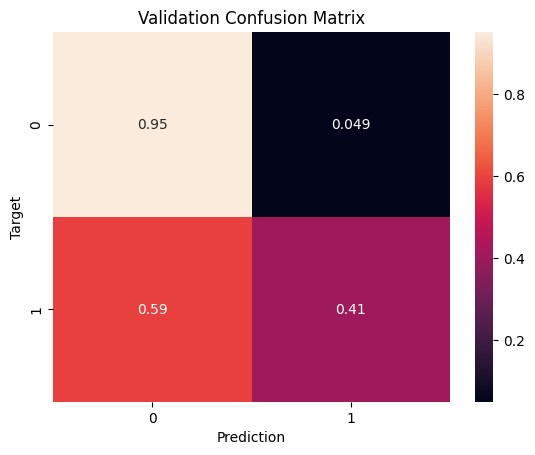

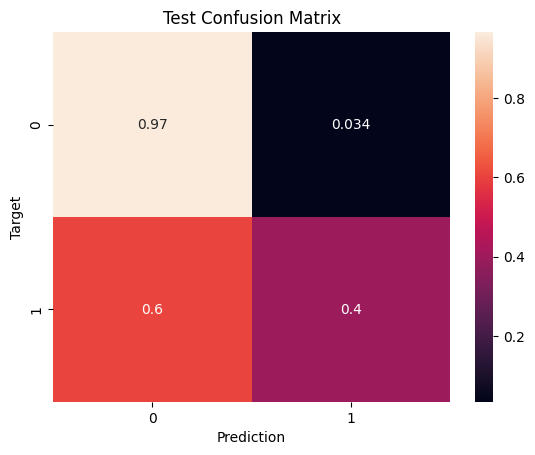

In [70]:
val_preds = predict_and_plot(X_val_input, y_val, 'Validation')
test_preds = predict_and_plot(X_test_input, y_test, 'Test')